# Lab 09 - Frequent Patterns
#### Name: Joanie Gannon
#### Name: Jake Schaeffer
#### Class: CSCI 349 - Intro to Data Mining
#### Semester: Spring 2020
#### Instructor: Brian King

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### 1) [P] Add the import statements:


`from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules`


These first exercises are going to allow you to leverage the actual documentation from the mlxtend user guide
online. Even though the first few of these are copied from their docs, it's good for you to have these examples in
one place. The second part of this lab will use a much more extensive transaction dataset.

In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

#### 2) [P] Go to the page: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/ . Enter the list dataset shown on the page. Then, copy the example code that transforms the list to a numpy encoded array, then to a pandas DataFrame with the correct column names. Output your data frame. It should look identical to:from mlxtend.preprocessing import TransactionEncoder from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]


te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


#### 3) [P] Show the result of describe() and info() on your dataframe.

In [4]:
df.describe()

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
count,5,5,5,5,5,5,5,5,5,5,5
unique,2,2,2,2,2,1,2,2,2,2,2
top,False,False,False,True,False,True,True,False,True,False,True
freq,4,3,4,4,4,5,3,3,3,4,3


#### 4) [P] Following along the mlxtend user guide, use the apriori algorithm to final all frequent itemsets with a min_support of 0.6. Show the resulting dataframe, and store the result, since you'll have many selection exercises next. All selection exercises must be done from this resulting frame. Set use_colnames=True. It'll be much easier to interpret your patterns.

In [5]:
ap = apriori(df, min_support=0.6, use_colnames=True)
ap

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


#### 5) [P] Select all frequent itemsets that have support => 0.8

In [6]:
ap[ap.support >= 0.8 ]


,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
5,0.8,"(Kidney Beans, Eggs)"


#### 6) [P] Select all frequent itemsets with at least 2 items. In their documentation, they often create additional helper variables to make it easier to select your data. That's entirely up to you. (I tend to be a purist, and reserve additional variables for only very complex selection criteria. Computing the length of an itemset is not one of them! It's entirely up to you.)

In [7]:
ap[ap.itemsets.apply(lambda x: len(x) >= 2)]

,support,itemsets
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"
10,0.6,"(Kidney Beans, Eggs, Onion)"


#### 7) [P] Select the frequent itemsets that contain an 'Onion' in the itemset.

In [8]:
ap[ap.itemsets.apply(lambda x: "Onion" in  x)]

,support,itemsets
3,0.6,(Onion)
6,0.6,"(Eggs, Onion)"
8,0.6,"(Kidney Beans, Onion)"
10,0.6,"(Kidney Beans, Eggs, Onion)"


#### 8) [P] Select the frequent itemsets that contain both 'Onion' and 'Eggs' in the itemset. (HINT: You should have 2 frequent itemsets selected. And, if you haven't learned about the set type in Python and all of the standard set operations, they can really make these types of questions much easier.)

In [9]:
ap[ap.itemsets.apply(lambda x: "Onion" in x and "Eggs" in  x)]

,support,itemsets
6,0.6,"(Eggs, Onion)"
10,0.6,"(Kidney Beans, Eggs, Onion)"


#### 9) [P] Select the frequent itemsets that contain either an 'Onion' or 'Kidney Beans' (or both) in the itemset. (HINT: You should have 8 frequent itemsets output.)

In [10]:
ap[ap.itemsets.apply(lambda x: "Onion" in x or "Kidney Beans" in  x)]

,support,itemsets
1,1.0,(Kidney Beans)
3,0.6,(Onion)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"
10,0.6,"(Kidney Beans, Eggs, Onion)"


#### 10) [P] http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/ contains the all the information about the association rule interestingness metrics, as well as giving you the code to generate the association rules. 

(NOTE – they mention a function called generate_rules(). The function is association_rules().) Generate rules with a minimum confidence of 0.7. Store your resulting data frame called rules. Show the entire data frame. (You should have 12 rules).

In [11]:
rules = association_rules(ap, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
8,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
9,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf


#### 11) [P] Output the top 5 rules in descending order by "lift", with the secondary sort key by "confidence".

In [12]:
rules.sort_values(by = ["lift", "confidence"], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
8,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
11,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
7,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
10,(Eggs),"(Kidney Beans, Onion)",0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf


#### 12) [P] Select all rules that have a 1.0 support for the antecedent.

In [13]:
rules[rules["antecedent support"]==1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.8,1.0,0.0,1.0


#### 13) [P] Select all rules that have at least 3 or more items represented in the rule (i.e. the union of the antecedent and consequent >= 3.)

In [14]:
rules[rules.apply(lambda x: len(x.antecedents) + len(x.consequents) >= 3, axis = 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
8,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
9,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
10,(Eggs),"(Kidney Beans, Onion)",0.8,0.6,0.6,0.75,1.25,0.12,1.6
11,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf


#### 14) [P] Select the rules that have confidence >= 0.75 and a lift > 1

In [15]:
rules[rules.apply(lambda x: x.confidence >= 0.75 and x.lift > 1, axis = 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
8,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
11,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.0,1.25,0.12,inf


#### 15) [M] Clearly indicate this new section in your notebook:

---
This is a new section
---

#### 16) [P] Read in the Chipotle dataset: url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv' df_chip = pd.read_csv(url, sep = '\t')

In [16]:
df_chip = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

#### 17) [P] Show the result of df_chip.info(verbose=True) You should have five variables.

In [17]:
df_chip.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


#### 18) [P] Show the result of describe(include='all')

In [18]:
df_chip.describe(include='all')

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


#### 19) [P] Show the first 10 observations

In [19]:
df_chip.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### 20) [M] Study what you see so far. Minimally, you should notice that you have three variables that need to be transformed into usable types. Which ones, and what do you need to do with them?

Order_ID and quantity can be transformed into much smaller int types, item_name and choice_description can probably be cast into strings. and item_price should be cast to a float, the '$' will probably have to be stripped off

#### 21) [P] Let's start doing some preprocessing. Convert the item_price field to a floating-point number.

In [20]:
#https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

df_chip.item_price = df_chip.item_price.astype('str') #This line is just so I can rerun the  cell
df_chip.item_price = df_chip.item_price.str.replace('$', '')
df_chip.item_price = df_chip.item_price.astype('float')
df_chip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


#### 22) [P] Convert the item_name to a categorical variable (HINT: Use pd.Categorical())

In [21]:
item_cat = pd.Categorical(df_chip.item_name)
df_chip.item_name = item_cat
df_chip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null category
choice_description    3376 non-null object
item_price            4622 non-null float64
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 152.0+ KB


#### 23) [P] How many unique item_name values are there?

In [22]:
len(item_cat.categories)

50

#### 24) [P] Show all of the unique values in item_name . Do you see any potential problems? (Leave them! Don't fix them. Just pay close attention. Need a hint? Salsa)

In [23]:
item_cat.categories

Index(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos',
       'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink',
       'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos',
       'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos',
       'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos',
       'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak Burrit

Problems:

       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa'

#### 25) [P] How many distinct orders are there?

In [24]:
df_chip.order_id.nunique()

1834

#### 26) [P] Show a boxplot of the number of line items per order. Do NOT consider the quantity of each item, just the count of line items. (NOTE: Many items appear multiple times in an order. Don't worry about that. Just count the number of lines per order.)

926     23
1483    14
205     12
691     11
1786    11
        ..
105      1
702      1
718      1
568      1
800      1
Name: order_id, Length: 1834, dtype: int64

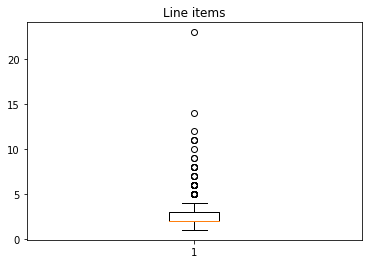

In [25]:
#I think I did this correctly?
fig1, ax1 = plt.subplots()
ax1.set_title("Line items")
counts = df_chip.order_id.value_counts()
ax1.boxplot(counts)
counts


#### 27) [P] Show a boxplot of the TOTAL number of items per order. Now, you must consider the quantity of each item in each order. (The box plot will be similar to the previous, with the exception that there will be more outliers, and the maximum outlier will be 35.)

order_id
917      1
819      1
821      1
512      1
1273     1
        ..
759     18
1660    19
1786    20
926     23
1443    35
Name: quantity, Length: 1834, dtype: int64

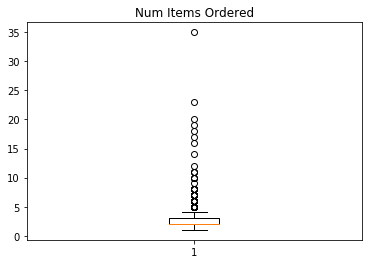

In [26]:
quantity = df_chip.groupby(df_chip.order_id).sum().quantity

fig1, ax1 = plt.subplots()
ax1.set_title("Num Items Ordered")
ax1.boxplot(quantity)
quantity.sort_values()

#### 28) [P] What were the top 5 ordered items by total quantity? Report the item and its total quantity ordered. Be sure to consider the quantity of each item ordered!

In [27]:
quant_by_item = df_chip.groupby(df_chip.item_name).sum().quantity

quant_by_item.sort_values(ascending = False).head(5)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

#### 29) [P] What is the total number of "Steak Burrito" ordered?

In [28]:
quant_by_item["Steak Burrito"]

386

#### 30) [P] What is mean price for an order (NOTE – This is NOT just a mean of the item_price column!)

In [29]:
mean_item_prices = df_chip.groupby(df_chip.order_id).sum()

print("Mean item price is ${:.2f}".format(mean_item_prices.item_price.mean()))

Mean item price is $18.81


#### 31) [P] What was total revenue for the day?

In [30]:
total_price = df_chip.groupby(df_chip.order_id).sum().item_price.sum()
print("Total is ${:.2f}".format(total_price))

Total is $34500.16


#### 32) [P] What was the largest total price for a single order? Show the order number and the total price.

In [31]:
max_paid = df_chip.groupby(df_chip.order_id).sum().item_price.max()
print("Max payment is ${:.2f}".format(max_paid))

Max payment is $205.25


#### 33) [P] Show the entire order to your answer to the previous question (NOTE: This should show you how some orders can contain multiple lines of the same item. Not uncommon!)

In [32]:
max_id = df_chip.groupby(df_chip.order_id).sum().item_price.idxmax()

df_chip[df_chip.order_id == max_id] 

,order_id,quantity,item_name,choice_description,item_price
2304,926,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuce]]",9.25
2305,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2306,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2307,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2308,926,1,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Lettu...",9.25
2309,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2310,926,1,Steak Burrito,"[Roasted Chili Corn Salsa, [Rice, Cheese, Sour...",9.25
2311,926,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2312,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce]]",8.75
2313,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",8.75


#### 34) [P] What order had the largest total quantity of items purchased? Show the order number and the total number of items

In [33]:
max_orders = df_chip.groupby(df_chip.order_id).sum().quantity.idxmax()
max_number = df_chip.groupby(df_chip.order_id).sum().quantity.max()

print("Numer of items is {} for order number {}".format(max_number, max_orders))

Numer of items is 35 for order number 1443


#### 35) [P] Show the entire order to your answer to the previous question

In [34]:
df_chip[df_chip.order_id == max_orders] 

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3599,1443,7,Bottled Water,NaN,10.50
3600,1443,1,6 Pack Soft Drink,[Coke],6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75
3604,1443,2,Bottled Water,NaN,3.00


#### 36) [P] Recall that this dataset is a set of transactions, where each observation represents one item purchased as part of an order_id. However, the data are not read in this way. You need to transform this dataset to a collection of binary encoded transactions, where each row represents ONE transaction, and the columns are binary encoded variables, with each variable representing ONE item available for purchase at Chipotle. Convert your data. Your resulting data frame should have an index representing the order_id, and columns representing each possible item from the item_name variable. For now, a transaction will ignore the quantity of item purchased. The shape of your resulting data frame should be (1834,50)

In [35]:
df_num_binarized = pd.get_dummies(data = df_chip.item_name)
df_num_binarized = df_num_binarized.set_index(df_chip.order_id)
df_num_binarized = df_num_binarized.groupby("order_id").max()
df_num_binarized.shape
#df_num_binarized.iloc[925]

(1834, 50)

#### 37) [P] Show the first 10 observations from your transaction data

In [36]:
df_num_binarized.head(10)

item_name,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### 38) [P] Too often, many start by considering a minimum support that is arbitrarily large. Go ahead and use the apriori method to generate frequent itemsets with a minsup value of 0.5. What happened?

In [37]:
ap2 = apriori(df_num_binarized, min_support=0.5, use_colnames=True)
ap2
#Nothing shows up for this support number

,support,itemsets


#### 39) [P] Take a step back. Your previous outcome is why you ALWAYS perform essential EDA tasks before you dive into mining a dataset! Report a table that shows the number of transactions each item occurred in, sorted in order of most frequent to least. NOTE: That number essentially represents the absolute support for 1- itemsets! So, include a column that shows the relative support (i.e. the fraction of total transactions.) (HINT: The item with the highest support is 33.5%!)

In [38]:
sorted_items = df_num_binarized.sum().sort_values(ascending=False)
total = len(df_num_binarized)
sorted_items = pd.DataFrame(sorted_items, columns = ["occurences"])
sorted_items['support'] = sorted_items.occurences/total * 100
sorted_items

,occurences,support
item_name,,
Chicken Bowl,615,33.533261
Chicken Burrito,489,26.663032
Chips and Guacamole,474,25.845147
Steak Burrito,342,18.647764
Canned Soft Drink,276,15.049073
Chips,208,11.341330
Steak Bowl,188,10.250818
Bottled Water,154,8.396947
Chips and Fresh Tomato Salsa,110,5.997819


#### 40) [P] Now, make a smarter decision. Like many large, real-world transaction datasets, data is sparse! You have many variables, and most observations use only a handful of them. This is the definition of a sparse dataset. You need a better minsup value. Regenerate frequent itemsets, but now use a minsup of 0.005. How many frequent itemsets were reported? Report your frequent items sorted by decreasing support order.

In [39]:
ap3 = apriori(df_num_binarized, min_support=0.005, use_colnames=True)
print("{} items reported with minsup of 0.005".format(len(ap3)))
ap3.sort_values(by = "support", ascending = False)

146 items reported with minsup of 0.005


,support,itemsets
11,0.335333,(Chicken Bowl)
12,0.266630,(Chicken Burrito)
18,0.258451,(Chips and Guacamole)
29,0.186478,(Steak Burrito)
7,0.150491,(Canned Soft Drink)
...,...,...
109,0.005453,"(Chicken Crispy Tacos, Chips and Guacamole)"
132,0.005453,"(Steak Burrito, Steak Soft Tacos)"
131,0.005453,"(Veggie Bowl, Steak Bowl)"
112,0.005453,"(Chicken Salad Bowl, Steak Bowl)"


#### 41) [M] In the context of association rules, explain the difference between support, confidence, lift, leverage and conviction.

Support: the proportions of observations that containthe given itemset. It is the minimum of the consequent and antecedent supporty.

Confidence: the probability of the consequent being presend given that the antecedent is present.

Lift: measure of independence of the antecedent and consequent using the ratio. The confidence that A implies B for all instanced where there is B.

Leverage: measure of independece using the difference between the antecendent and cosequent using the difference. Leverage 1 means B depends completely on A.

Conviction: Measure of how dependent the consequent is on the antecedent. The conviction is 0 if consequent completely depends on the antecedent, 1 if they are independent.

#### 42) [P] Generate all association rules that meet a minimum support of 0.01. How many rules were output in total?

In [40]:
#http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
ars = association_rules(ap3, metric = "support", min_threshold=0.01)
print("{} rules total".format(len(ars)))

108 rules total


#### 43) [P] Show only the rules that have a lift > 2, but sorted in order of decreasing confidence. What is your strongest rule?

In [41]:
ars2 = association_rules(ap3, metric = "lift", min_threshold=2)
ars2.sort_values(by = "confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,"(Canned Soft Drink, Chips and Tomatillo Red Ch...",(Chicken Bowl),0.009815,0.335333,0.008179,0.833333,2.485095,0.004888,3.988004
13,"(Chips, Bottled Water)",(Chicken Bowl),0.019084,0.335333,0.015267,0.800000,2.385691,0.008868,3.323337
32,"(Chips, Chips and Guacamole)",(Chicken Bowl),0.009815,0.335333,0.007088,0.722222,2.153749,0.003797,2.392803
22,"(Chicken Bowl, Chips and Tomatillo Red Chili S...",(Canned Soft Drink),0.015812,0.150491,0.008179,0.517241,3.437031,0.005799,1.759698
14,"(Chicken Bowl, Bottled Water)",(Chips),0.037623,0.113413,0.015267,0.405797,3.578038,0.011000,1.492061
7,(Chips and Tomatillo Green Chili Salsa),(Canned Soft Drink),0.023446,0.150491,0.009269,0.395349,2.627064,0.005741,1.404958
9,(Chips and Tomatillo Red Chili Salsa),(Canned Soft Drink),0.025082,0.150491,0.009815,0.391304,2.600189,0.006040,1.395622
5,(Canned Soda),(Steak Burrito),0.051254,0.186478,0.019629,0.382979,2.053751,0.010071,1.318467
25,(Chips and Tomatillo Red Chili Salsa),"(Canned Soft Drink, Chicken Bowl)",0.025082,0.060523,0.008179,0.326087,5.387779,0.006661,1.394062
18,"(Canned Soft Drink, Chicken Bowl)",(Chips),0.060523,0.113413,0.019084,0.315315,2.780232,0.012220,1.294883


#### 44) [M] Consider yourself the data scientist hired to help Chipotle understand item purchasing patterns. Interpret the following rule for the non data scientist. Be careful not to say, "if your customers purchase canned soft drinks AND chips, they are also going to buy chicken bowls." Think! What do strong association rules convey?

It appears that bottled water and chips are common add-ons to popular items. One of the most popular items seems to be the Chicken bowl, and we can see that when customers are purchasing both a meal and a drink, chips are often included.

#### 45) [P] Suppose your boss is interested in what items are most likely related to a purchase of "Chips and Guacamole". Using your rule set generated, first select the rules that have "Chips and Guacamole" listed in the consequent itemset. Sort the rules by confidence, then by lift. And interpret your findings. Identify the item(s) that are the most suggestive of including "Chips and Guacamole" when purchased, and state why.

In [42]:
c_and_g = ars[ars.consequents.str.contains("Chips and Guacamole", regex=False)]
c_and_g.sort_values(by = ["confidence", "lift"], ascending = False)
#A 6 pack soft drink, veggie burrito, and veggie bowl. This is bacuase the confidence is highest for these items.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(6 Pack Soft Drink),(Chips and Guacamole),0.029444,0.258451,0.011450,0.388889,1.504688,0.003841,1.213443
88,(Veggie Burrito),(Chips and Guacamole),0.049618,0.258451,0.016903,0.340659,1.318079,0.004079,1.124682
86,(Veggie Bowl),(Chips and Guacamole),0.044711,0.258451,0.014722,0.329268,1.274004,0.003166,1.105581
74,(Chicken Soft Tacos),(Chips and Guacamole),0.058342,0.258451,0.017448,0.299065,1.157143,0.002370,1.057943
82,(Steak Bowl),(Chips and Guacamole),0.102508,0.258451,0.028899,0.281915,1.090785,0.002405,1.032675
6,(Barbacoa Burrito),(Chips and Guacamole),0.047983,0.258451,0.011996,0.250000,0.967300,-0.000406,0.988731
46,(Chicken Bowl),(Chips and Guacamole),0.335333,0.258451,0.081243,0.242276,0.937416,-0.005424,0.978653
64,(Chicken Burrito),(Chips and Guacamole),0.266630,0.258451,0.062159,0.233129,0.902022,-0.006752,0.966979
32,(Canned Soft Drink),(Chips and Guacamole),0.150491,0.258451,0.033806,0.224638,0.869168,-0.005089,0.956390
84,(Steak Burrito),(Chips and Guacamole),0.186478,0.258451,0.041439,0.222222,0.859822,-0.006756,0.953420


#### 46) [P] These data suggest that the "Chicken Bowl" is the single most frequent item purchased for this particular location. Great. Let's dive into those chicken bowls more. As you know, Chipotle lets you customize your items. That's what the choice_description field is for. 

Process all of the items listed in the "choice_description" field by creating a new transaction dataset representing binary encoded transaction data for only Chicken Bowl. Note – this is tricky because the choice_description variable is read in as a long string. The string itself represents a list, and quite often, it's a list of lists. You need to process this to be an actual flattened list of items. Then, you can easily convert these to transactions. This page will give you an idea on how to do it. https://chrisalbon.com/python/data_wrangling/pandas_expand_cells_containing_lists/. However, keep in mind that many of these lists contain lists themselves! You may need to just write a python function that takes in a list of lists, and returns a single list of all of the items flattened out. Then, apply that function.

In [69]:
#http://code.activestate.com/recipes/580634-merge-unique-items-from-multiple-lists-into-a-new-/
chicken_bowls = df_chip[df_chip.item_name == "Chicken Bowl"]

tags = chicken_bowls['choice_description']

unique = []

for i in tags.index:
    choices = chicken_bowls['choice_description'][i]
    #Remove braces
    choices = choices.replace('[','')
    choices = choices.replace(']','')
    #Turn into list
    choices = choices.split(',')
    tags[i] = choices
    #Make list of unique values
    unique = (list(set().union(unique, choices)))

# expand df.tags into its own dataframe
tags = tags.apply(pd.Series)

#https://stackoverflow.com/questions/36487842/python-pandas-how-to-create-a-binary-matrix-from-column-of-lists
#tags.
#.str.replace(' ','').str.get_dummies(sep=',')


# rename each variable is tags
tags = tags.rename(columns = lambda x : 'tag', index = {'':'order_id'})
tags
# view the tags dataframe

options_binarized = pd.get_dummies(data = tags)
options_binarized = options_binarized.rename(columns = lambda x : str(x))
options_binarized = options_binarized.set_index(tags.index)
#options_binarized = options_binarized.groupby("order_id").max()
options_binarized
#tags

/Users/joaniegannon/opt/anaconda3/envs/csci349/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,tag_Fresh Tomato (Mild),tag_Fresh Tomato Salsa,tag_Fresh Tomato Salsa (Mild),tag_Roasted Chili Corn Salsa,tag_Roasted Chili Corn Salsa (Medium),tag_Tomatillo Green Chili Salsa,tag_Tomatillo Red Chili Salsa,tag_Tomatillo-Green Chili Salsa (Medium),tag_Tomatillo-Red Chili Salsa (Hot),tag_White Rice,...,tag_ Pinto Beans,tag_ Rice,tag_ Sour Cream,tag_ Cheese,tag_ Fajita Vegetables,tag_ Guacamole,tag_ Lettuce,tag_ Sour Cream,tag_ Lettuce,tag_ Sour Cream
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4591,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4595,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4599,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 47) [P,M] Use your own knowledge to generate strong frequent patterns and association rules for the choice_description items used with Chicken Bowls. Explain your findings.